# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
print('Total rows:', len(df))
columns = [
    'last_price',
    'total_area',
    'living_area',
    'first_day_exposition',
    'rooms',
    'ceiling_height',
    'cityCenters_nearest',
    'locality_name'    
]
df.sample(40)

Total rows: 23699


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20569,16,6995000.0,62.50,2018-06-28T00:00:00,2,2.60,25.0,37.30,2,NaN,...,11.20,NaN,Санкт-Петербург,15510.0,16242.0,1.0,492.0,0.0,NaN,163.0
23504,20,4800000.0,42.50,2017-04-18T00:00:00,1,2.80,26.0,15.60,21,False,...,11.00,2.0,Санкт-Петербург,20028.0,21740.0,0.0,NaN,1.0,400.0,128.0
13855,5,1150000.0,41.70,2018-10-25T00:00:00,2,NaN,4.0,27.00,4,NaN,...,6.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,84.0
8057,9,4700000.0,54.80,2017-06-08T00:00:00,2,NaN,5.0,27.70,1,NaN,...,13.20,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22082,3,6100000.0,44.30,2016-05-05T00:00:00,1,NaN,13.0,22.80,5,NaN,...,9.70,NaN,Санкт-Петербург,23808.0,5332.0,1.0,2245.0,1.0,1018.0,712.0
17301,5,3600000.0,39.30,2017-10-26T00:00:00,1,2.60,12.0,20.00,2,NaN,...,8.50,NaN,Санкт-Петербург,33632.0,14731.0,0.0,NaN,1.0,207.0,30.0
6348,1,11615928.0,88.80,2016-05-12T00:00:00,3,3.10,16.0,52.21,6,NaN,...,11.78,0.0,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,54.0
3054,20,900000.0,61.40,2018-02-03T00:00:00,3,2.70,2.0,40.00,2,NaN,...,9.50,NaN,Подпорожье,NaN,NaN,NaN,NaN,NaN,NaN,363.0
19767,12,4150000.0,38.00,2018-12-06T00:00:00,1,2.60,14.0,30.00,3,NaN,...,8.00,NaN,Санкт-Петербург,28107.0,11706.0,0.0,NaN,0.0,NaN,118.0
23452,6,1350000.0,31.00,2017-12-19T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm') 

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


In [6]:
pd.DataFrame(round((df.describe().mean()*100),2)).style.background_gradient('coolwarm') 

,0
total_images,297419
last_price,9.94143e+09
total_area,310861
rooms,296589
ceiling_height,182713
floors_total,296516
living_area,279439
floor,296972
kitchen_area,269736
balcony,152378


In [7]:
pd.DataFrame(round((df.head().mean()*100),2)).style.background_gradient('coolwarm') 

,0
total_images,780
last_price,1.92892e+09
total_area,9268
rooms,220
ceiling_height,286.5
floors_total,1200
living_area,3397.5
floor,700
is_apartment,nan
studio,0


### Вывод

***

## Предобработка данных

In [8]:

df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) # заменили пропущенные значения на средние
df['airports_nearest'] = df['airports_nearest'].fillna(0) # Nanы заменили на нули. Так как нам этот столбец в дальнейшем для расчёта не нужен, то можно их заменить на нули для эстетики, чтобы не было пропусков
df['parks_around3000'] = df['parks_around3000'].fillna(0) # Nanы заменили на 0. Так как пропуски обусловлены их отсутствием
df['ponds_around3000'] = df['ponds_around3000'].fillna(0) # Nanы заменили на 0. Так как пропуски обусловлены их отсутствием
df['ponds_nearest'] = df['ponds_nearest'].fillna(' ') # Nanы заменили на пропуск. Так как если нет парка в радиусе 3км, значит и нет расстояния до него
df['parks_nearest'] = df['parks_nearest'].fillna(' ') # Nanы заменили на пропуск. Так как если нет парка в радиусе 3км, значит и нет расстояния до него
df['balcony'] = df['balcony'].fillna(0) # Nanы заменили на нули. Думаю, что Nanы были получены в результате того, что данные о балконе в этих квартирах отсутствуют, а значит можем ставить нули
df['locality_name'] = df['locality_name'].fillna('unknown_location') #пропущенные значения заменили на 'unknown_location'
df['days_exposition'] = df.groupby('rooms')['days_exposition'].apply(lambda x: x.fillna(x.median()))
df['koeff_liv_k_tot'] = df['living_area']/df['total_area'] # добавили отношение жилой к общей
df['living_area'] = df['living_area'].fillna((df['koeff_liv_k_tot'].median())*df['total_area']) #заменили пропуски в жилой на коэф-т помноженный на общую
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] - df['living_area']) # пропуски в kitchen_area поменяли на разность из общей и жилой
df['total_area'] = df['total_area'].fillna(df['kitchen_area'] + df['living_area'])
df["cityCenters_nearest"] = df.groupby("last_price").transform(lambda x: x.fillna(x.mean()))


In [9]:
df['is_apartment'].value_counts() # булевы значения, которые показывают нам какие квартиры относятся к апартаментам, а какие нет. Остальные значения Nan-ы
df['is_apartment'] = df['is_apartment'].fillna(0)# Я решил, что они означают так же False  и поэтому я их заменил на нули а булевы значения поменял на 'int'
df['is_apartment'] = df['is_apartment'].astype('int')
df['is_apartment'].value_counts()

0    23649
1       50
Name: is_apartment, dtype: int64

In [10]:
df['last_price'] = df['last_price'].astype('int')

In [11]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

In [12]:
df['first_day_exposition']=pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' # изменил формат столбца first_day_exposition на datetime64
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null object
ponds_aroun

In [13]:
df['locality_name'] = df['locality_name'].astype('str')

In [14]:
def filterupper(text):
   return " ".join([word for word in text.split() if word[0].isupper()])
df['locality_name'] = df['locality_name'].apply(filterupper)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_liv_k_tot
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,...,0.0,Санкт-Петербург,18863.0,20,1.0,482,2.0,755,114.0,0.472222
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,0,...,2.0,Шушары,12817.0,7,0.0,,0.0,,81.0,0.460396
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,0,...,0.0,Санкт-Петербург,21741.0,10,1.0,90,2.0,574,558.0,0.612500
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.289724,9,0,...,0.0,Санкт-Петербург,28098.0,0,2.0,84,3.0,234,424.0,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,...,0.0,Санкт-Петербург,31856.0,2,2.0,112,1.0,48,121.0,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,0,...,0.0,Санкт-Петербург,24665.0,9,1.0,796,3.0,381,114.0,0.547792
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000000,4,0,...,0.0,Тосно,0.0,14,0.0,,0.0,,45.0,0.644068
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700000,1,0,...,0.0,Рождествено,0.0,18,0.0,,0.0,,91.0,0.523810
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.583247,12,0,...,2.0,Санкт-Петербург,39140.0,13,2.0,173,3.0,196,602.0,NaN


  <div class="alert alert-info">
    <h2> Комментарий</h2>:
    
1. В столбце 'ceiling_height' заменил пропущенные значения на средние
    
2. В столбце 'airports_nearest' Nanы заменил на нули. Так как нам этот столбец в дальнейшем для расчёта не нужен, то можно их заменить на нули для эстетики, чтобы не было пропусков
    
3. В столбце 'parks_around3000' и 'ponds_around3000' Nanы заменил на 0. Так как пропуски обусловлены отсутствием данных
    
4. В столбце 'ponds_nearest' и 'parks_nearest' Nanы заменили на пропуск. Так как если нет парка в радиусе 3км, значит и нет расстояния до него
    
5. В столбце 'balcony' Nanы заменили на нули. Думаю, что Nanы были получены в результате того, что данные о балконе в этих квартирах отсутствуют, а значит можем ставить нули
    
6. В столбце 'locality_name' пропущенные значения заменили на 'unknown_location'.
    
7. В столбце 'days_exposition' применили метод groupby по 'room' и вместо пропущенных значений поставили усредненные в зависимоти от 'room' 
    
8. Добавили столбец 'koeff_liv_k_tot' он нам нужен будет для произведения дальнейших расчётов
    
9. В столбце 'living_area' заменили пропуски в жилой на коэф-т, который вычислили ранее помноженный на общую площадь
    
10.В столбце 'kitchen_area' пропуски поменяли на разность из общей площади и жилой 
    
11.В столбце 'total_area' пропуски заполнили суммой между кухней и жилой площадью
    
12.В столбце 'cityCenters_nearest' заполнили пропуски, применив метод groupby к 'last_price' со средним значением 
    
13.В столбце 'is_apartment' булевы значения, которые показывают нам какие квартиры относятся к апартаментам, а какие нет. Остальные значения Nan-ы. Я решил, что они означают так же False  и поэтому я их заменил на нули а булевы значения поменял на 'int'
    
14.Столбец 'last_price' и 'cityCenters_nearest' поменял на тип данных 'int'
    
15.Столбец 'first_day_exposition' изменил тип данных на datetime64
    
16.Столбец 'locality_name' изменил тип данных на 'str'. Так же для этого столбца написал функцию, которая оставяет только слова с Большой буквы, а лишнее не показывает. Таким образом оставили только названия населённых пунктов.<dev>
    
    
    
    

***

## Расчёты и добавление результатов в таблицу

In [15]:
df['price_for_one_meter'] = df['last_price'] / df['total_area'] # цена за квадратный метр
df['year_exposition'] = df['first_day_exposition'].apply(lambda x: x.strftime('%Y')) # создал и вывел отдельные столбцы день, месяц и год
df['mounth_exposition'] = df['first_day_exposition'].apply(lambda x: x.strftime('%B'))
df['day_exposition'] = df['first_day_exposition'].apply(lambda x: x.strftime('%d'))
df


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_liv_k_tot,price_for_one_meter,year_exposition,mounth_exposition,day_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,...,1.0,482,2.0,755,114.0,0.472222,120370.370370,2019,March,07
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,0,...,0.0,,0.0,,81.0,0.460396,82920.792079,2018,December,04
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,0,...,1.0,90,2.0,574,558.0,0.612500,92785.714286,2015,August,20
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.289724,9,0,...,2.0,84,3.0,234,424.0,NaN,408176.100629,2015,July,24
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,...,2.0,112,1.0,48,121.0,0.320000,100000.000000,2018,June,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,0,...,1.0,796,3.0,381,114.0,0.547792,72490.845228,2017,March,21
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000000,4,0,...,0.0,,0.0,,45.0,0.644068,52542.372881,2018,January,15
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700000,1,0,...,0.0,,0.0,,91.0,0.523810,44091.710758,2018,February,11
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.583247,12,0,...,2.0,173,3.0,196,602.0,NaN,149511.400651,2017,March,28


In [16]:
def floor_check(row): # этим методом создали столбец floor_group, внесли в него этаж квартиры - первый, последний, другой;
    floor = row['floor']
    floors = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors:
        return 'последний'
    return 'другой'
df['floor_group'] = df.apply(floor_check, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null object
ponds_aroun

In [17]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_liv_k_tot,price_for_one_meter,year_exposition,mounth_exposition,day_exposition,floor_group
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,...,482,2.0,755,114.0,0.472222,120370.370370,2019,March,07,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,0,...,,0.0,,81.0,0.460396,82920.792079,2018,December,04,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,0,...,90,2.0,574,558.0,0.612500,92785.714286,2015,August,20,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.289724,9,0,...,84,3.0,234,424.0,NaN,408176.100629,2015,July,24,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,...,112,1.0,48,121.0,0.320000,100000.000000,2018,June,19,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.400000,5,0,...,,0.0,,55.0,0.473684,95065.789474,2018,September,10,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.600000,6,0,...,,0.0,,155.0,0.284182,99195.710456,2017,November,02,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,40.658769,22,0,...,,0.0,,91.0,NaN,110544.692737,2019,April,18,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.430000,26,0,...,,0.0,,189.0,0.465320,87454.764777,2018,May,23,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,0,...,,0.0,,289.0,0.714754,88524.590164,2017,February,26,другой


  <div class="alert alert-info">
    <h2> Комментарий </h2>
   Добавил столбец 'price_for_one_meter' - цена за квадратный метр. Кроме этого создал и вывел отдельные столбцы день, месяц и год. Написал функцию и создал столбец floor_group, куда внёс этаж квартиры - первый, последний, другой
    

***

## Исследовательский анализ данных

  <div class="alert alert-info">
    <h2> Комментарий </h2>
    Задание: Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')


plt.rcParams['figure.figsize'] = (10, 5)

Text(0, 0.5, 'count')

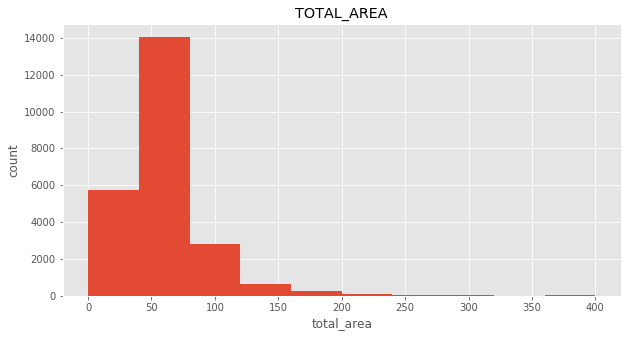

In [19]:
pd.Series(df['total_area']).hist(range = (0,400))
plt.title("TOTAL_AREA")
plt.xlabel("total_area")
plt.ylabel("count")

 <div class="alert alert-info">
    <h2> Комментарий </h2>
    Изучив, общую площадь, заметил, что в основном в датафрейме квартиры представлены от 50 до 70 кв.метров

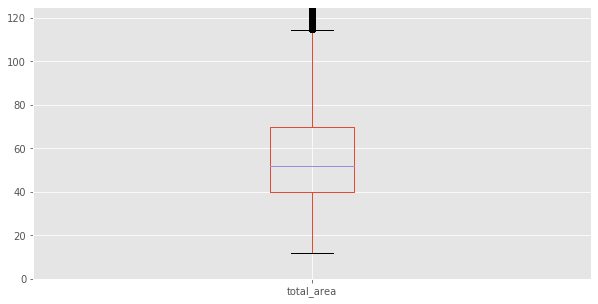

In [20]:
plt.ylim(0, 125)
df.boxplot('total_area')

 <div class="alert alert-info">
    <h2> Комментарий </h2>
    Построив ящик с усами заметил, что средняя величина лежит на 50кв.метров, а выше 118кв.метров в датафрейме выбросы

Text(0, 0.5, 'count')

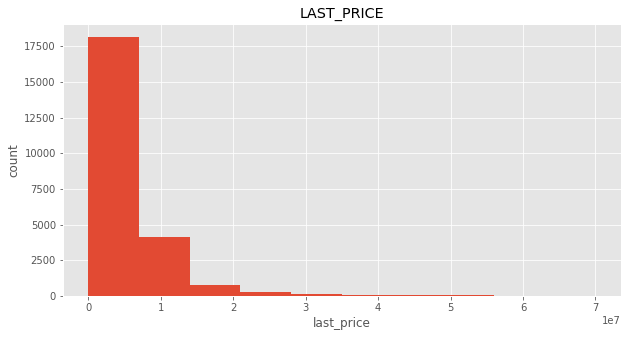

In [21]:
pd.Series(df['last_price']).hist(range = (0,70000000))
plt.title("LAST_PRICE")
plt.xlabel("last_price")
plt.ylabel("count")


 <div class="alert alert-info">
    <h2> Комментарий </h2>
    Цена в основном представлена до 13млн 

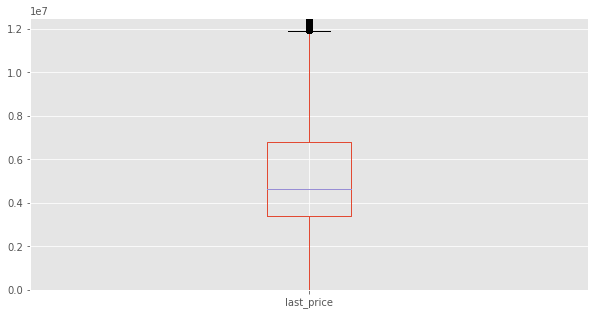

In [22]:
plt.ylim(0, 12500000)
df.boxplot('last_price')

Text(0, 0.5, 'count')

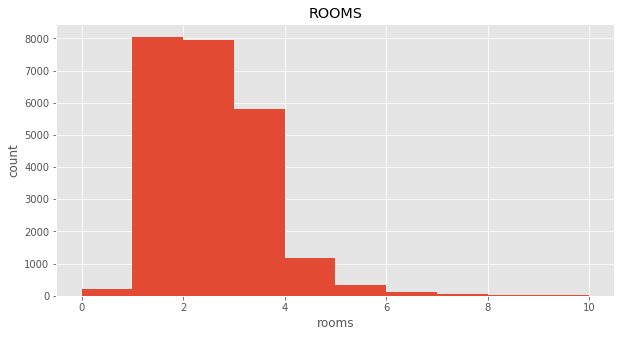

In [23]:
pd.Series(df['rooms']).hist(range = (0,10)) 
plt.title("ROOMS")
plt.xlabel("rooms")
plt.ylabel("count")


 <div class="alert alert-info">
    <h2> Комментарий </h2>
    1,2 и 3х комнатные квартиры в большинстве

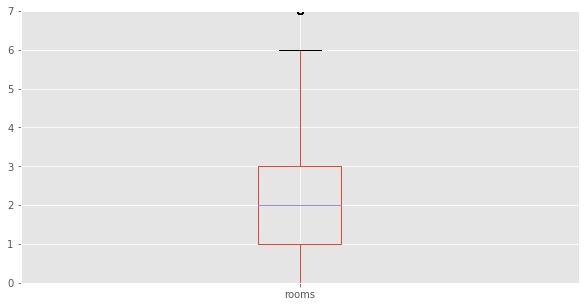

In [24]:
plt.ylim(0, 7)
df.boxplot('rooms')

Text(0, 0.5, 'count')

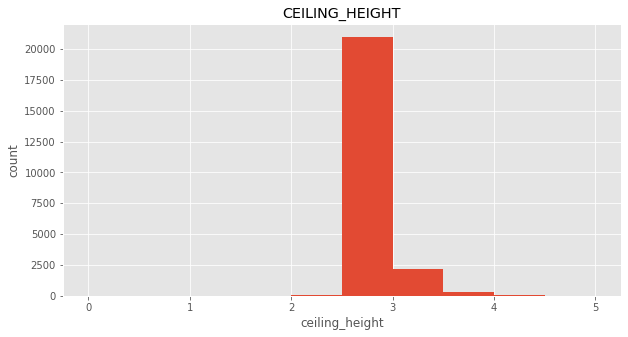

In [25]:
pd.Series(df['ceiling_height']).hist(range = (0,5))
plt.title("CEILING_HEIGHT")
plt.xlabel("ceiling_height")
plt.ylabel("count")


 <div class="alert alert-info">
    <h2> Комментарий </h2>
    2,75м - это средняя высота потолков в датафрейме

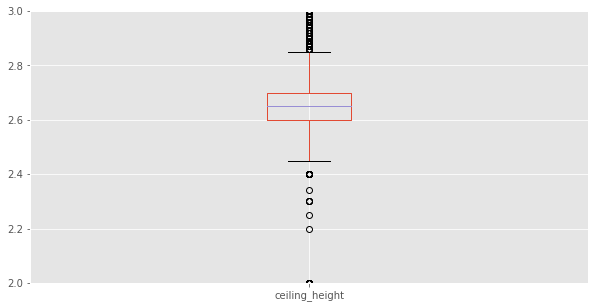

In [26]:
plt.ylim(2, 3)
df.boxplot('ceiling_height')

 <div class="alert alert-info">
    <h2> Комментарий </h2>
    Построил для каждого параметра гистограмму и изучил их ящиком с усами для каждого.
    Площадь квартиры среднее по датафрейму от 18 до 118кв.м со средним значением в 50 кв.м
    Средняя цена квартиры составляет 4,7млн
    Среднее число комнат 2, а высота потолков в среднем 2,7м

***

<div class="alert alert-info">
    <h2> Комментарий </h2>
    
         Задание: Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    23699.000000
mean       170.666632
std        206.421046
min          1.000000
25%         45.000000
50%         92.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64


Text(0, 0.5, 'count')

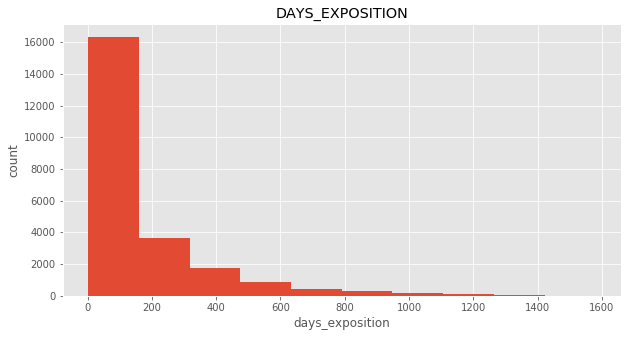

In [27]:
print(df['days_exposition'].describe()) # стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии или выбросы.
pd.Series(df['days_exposition']).hist()
plt.title("DAYS_EXPOSITION")
plt.xlabel("days_exposition")
plt.ylabel("count")


 <div class="alert alert-info">
    <h2> Комментарий </h2>
    Видно, что объявления активно менее 200 дней

Text(0, 0.5, 'count')

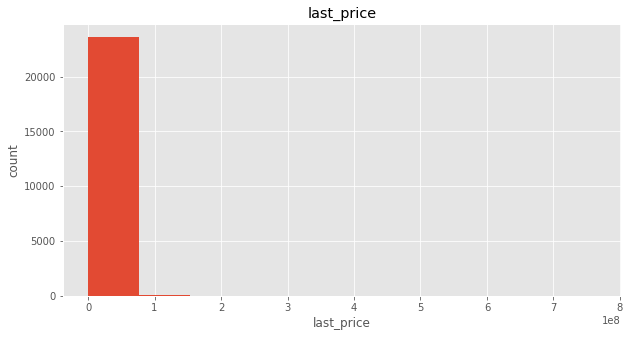

In [28]:
pd.Series(df['last_price']).hist()
plt.title("last_price")
plt.xlabel("last_price")
plt.ylabel("count")

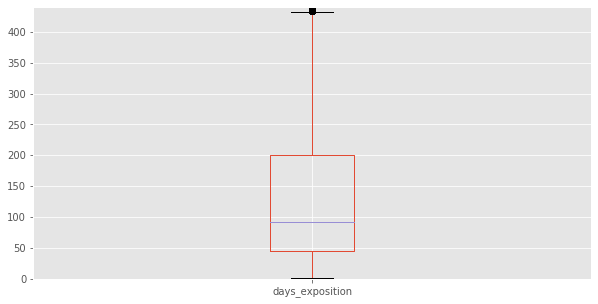

In [29]:
plt.ylim(0, 440)
df.boxplot('days_exposition')



 <div class="alert alert-info">
    <h2> Комментарий </h2>
    Всё, что больше 430 дней можно считать выбросами, медианные значения при этом находятся на 95 днях.
#Итак, график показывает, что нормальным считается продажа квартиры за 430 дней, при этом среднее время продажи составило 95 дней
#Ящик с усами показывает, что до 50 дней это быстрая продажа квартиры, а больше 200 дней это затянувшаяся продажа.

***

<div class="alert alert-info">
    <h2> Комментарий </h2>
    
    Задание: Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_liv_k_tot,price_for_one_meter,year_exposition,mounth_exposition,day_exposition,floor_group
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,...,482,2.0,755,114.0,0.472222,120370.370370,2019,March,07,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,0,...,,0.0,,81.0,0.460396,82920.792079,2018,December,04,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,0,...,90,2.0,574,558.0,0.612500,92785.714286,2015,August,20,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.289724,9,0,...,84,3.0,234,424.0,NaN,408176.100629,2015,July,24,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,...,112,1.0,48,121.0,0.320000,100000.000000,2018,June,19,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,0,...,796,3.0,381,114.0,0.547792,72490.845228,2017,March,21,другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000000,4,0,...,,0.0,,45.0,0.644068,52542.372881,2018,January,15,другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700000,1,0,...,,0.0,,91.0,0.523810,44091.710758,2018,February,11,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.583247,12,0,...,173,3.0,196,602.0,NaN,149511.400651,2017,March,28,другой


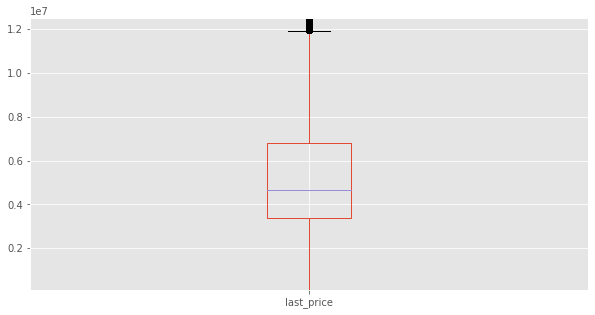

In [30]:
plt.ylim(100000, 12500000)
df.boxplot('last_price')
df.query('last_price < 20000000') 
df.query('last_price > 1000000')
 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_liv_k_tot,price_for_one_meter,year_exposition,mounth_exposition,day_exposition,floor_group
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,...,482,2.0,755,114.0,0.472222,120370.370370,2019,March,07,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,0,...,,0.0,,81.0,0.460396,82920.792079,2018,December,04,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,0,...,90,2.0,574,558.0,0.612500,92785.714286,2015,August,20,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.289724,9,0,...,84,3.0,234,424.0,NaN,408176.100629,2015,July,24,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,...,112,1.0,48,121.0,0.320000,100000.000000,2018,June,19,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,0,...,796,3.0,381,114.0,0.547792,72490.845228,2017,March,21,другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000000,4,0,...,,0.0,,45.0,0.644068,52542.372881,2018,January,15,другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700000,1,0,...,,0.0,,91.0,0.523810,44091.710758,2018,February,11,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.583247,12,0,...,173,3.0,196,602.0,NaN,149511.400651,2017,March,28,другой


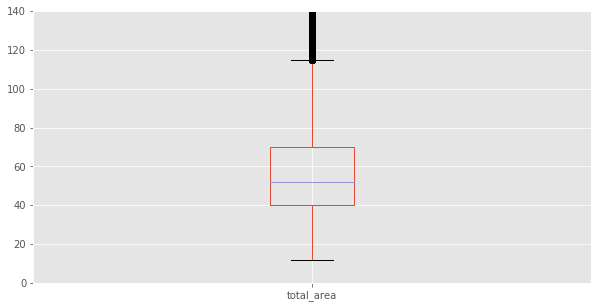

In [31]:
plt.ylim(0, 140)
df.boxplot('total_area')
df.query('total_area < 150') 
df.query('total_area > 10')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_liv_k_tot,price_for_one_meter,year_exposition,mounth_exposition,day_exposition,floor_group
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,...,482,2.0,755,114.0,0.472222,120370.370370,2019,March,07,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,0,...,,0.0,,81.0,0.460396,82920.792079,2018,December,04,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,0,...,90,2.0,574,558.0,0.612500,92785.714286,2015,August,20,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.289724,9,0,...,84,3.0,234,424.0,NaN,408176.100629,2015,July,24,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,...,112,1.0,48,121.0,0.320000,100000.000000,2018,June,19,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,0,...,796,3.0,381,114.0,0.547792,72490.845228,2017,March,21,другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000000,4,0,...,,0.0,,45.0,0.644068,52542.372881,2018,January,15,другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700000,1,0,...,,0.0,,91.0,0.523810,44091.710758,2018,February,11,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.583247,12,0,...,173,3.0,196,602.0,NaN,149511.400651,2017,March,28,другой


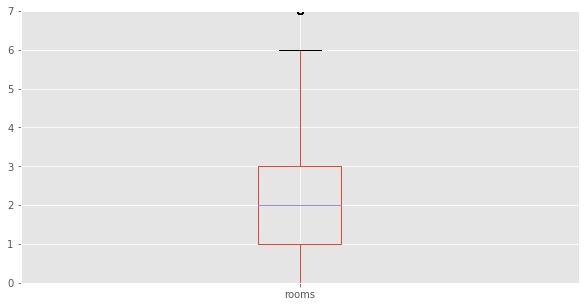

In [32]:
plt.ylim(0, 7)
df.boxplot('rooms')
df.query('rooms < 7') 
df.query('rooms > 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_liv_k_tot,price_for_one_meter,year_exposition,mounth_exposition,day_exposition,floor_group
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,...,482,2.0,755,114.0,0.472222,120370.370370,2019,March,07,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,0,...,,0.0,,81.0,0.460396,82920.792079,2018,December,04,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,0,...,90,2.0,574,558.0,0.612500,92785.714286,2015,August,20,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.289724,9,0,...,84,3.0,234,424.0,NaN,408176.100629,2015,July,24,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,...,112,1.0,48,121.0,0.320000,100000.000000,2018,June,19,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,0,...,796,3.0,381,114.0,0.547792,72490.845228,2017,March,21,другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000000,4,0,...,,0.0,,45.0,0.644068,52542.372881,2018,January,15,другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700000,1,0,...,,0.0,,91.0,0.523810,44091.710758,2018,February,11,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.583247,12,0,...,173,3.0,196,602.0,NaN,149511.400651,2017,March,28,другой


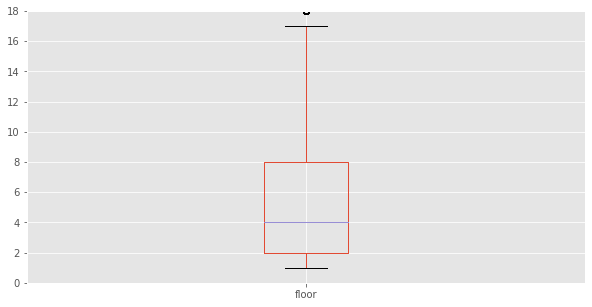

In [33]:
plt.ylim(0, 18)
df.boxplot('floor')
df.query('floor < 18') 
df.query('floor > 0')


<div class="alert alert-info">
    <h2> Комментарий </h2>
  Всё, что больше 12млн можно считать выбросами, медианные значения при этом находятся на 5млн. В основном продают квартиры с ценой до 12 млн.  Видно, что нормальными считаются квартиры до 6 комнат, со средним значением 2 комнаты. 1,2х и 3х комнатных большинство. В основной своей массе продают квартиры до 118 м2, с медианным значением 50м2. Квартиры, находящиеся в списке, с медианой в 4 этажа, большинство квартир от 2го до 8го этажа.Всё, что выше 17го этажа выбросы.
  

In [34]:
df = df.query('floor < 18 and floor > 0 and ceiling_height < 4 and total_area < 150 and total_area > 10 and last_price < 20000000 and last_price > 1000000')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koeff_liv_k_tot,price_for_one_meter,year_exposition,mounth_exposition,day_exposition,floor_group
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,0,...,482,2.0,755,114.0,0.472222,120370.370370,2019,March,07,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,0,...,,0.0,,81.0,0.460396,82920.792079,2018,December,04,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,0,...,90,2.0,574,558.0,0.612500,92785.714286,2015,August,20,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,0,...,112,1.0,48,121.0,0.320000,100000.000000,2018,June,19,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.400000,5,0,...,,0.0,,55.0,0.473684,95065.789474,2018,September,10,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,0,...,796,3.0,381,114.0,0.547792,72490.845228,2017,March,21,другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000000,4,0,...,,0.0,,45.0,0.644068,52542.372881,2018,January,15,другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700000,1,0,...,,0.0,,91.0,0.523810,44091.710758,2018,February,11,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.583247,12,0,...,173,3.0,196,602.0,NaN,149511.400651,2017,March,28,другой


***

<div class="alert alert-info">
    <h2> Комментарий </h2>
    
                Задание: Какие факторы больше всего влияют на стоимость квартиры. Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

                     cityCenters_nearest     rooms  total_area
cityCenters_nearest             1.000000  0.205765    0.138976
rooms                           0.205765  1.000000    0.841804
total_area                      0.138976  0.841804    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1af8d0ef90>,
      dtype=object)

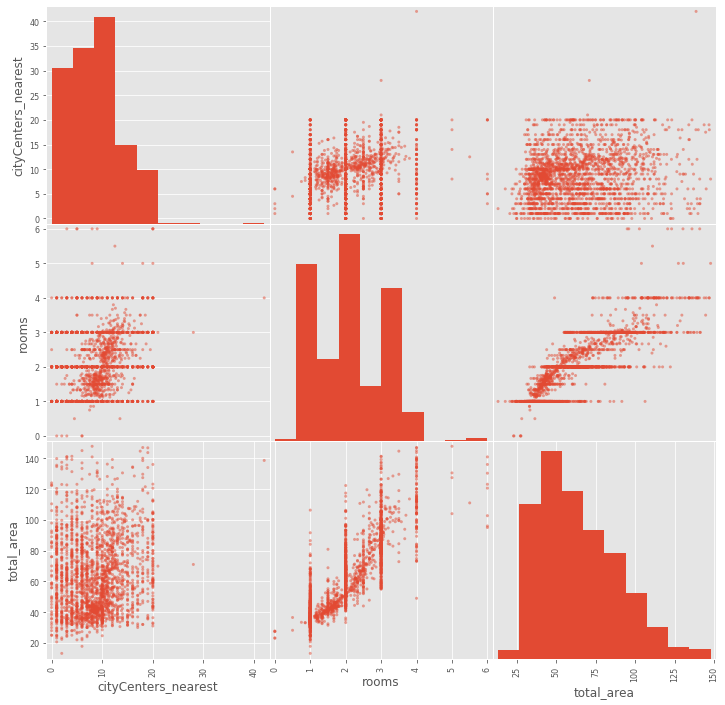

In [36]:
price_stat_multi_1 =  df.pivot_table(
    index='last_price', values=['total_area','rooms','cityCenters_nearest']
)
print(price_stat_multi_1.corr()) 
pd.plotting.scatter_matrix(price_stat_multi_1, figsize=(12,12)) 

Text(0, 0.5, 'last_price')

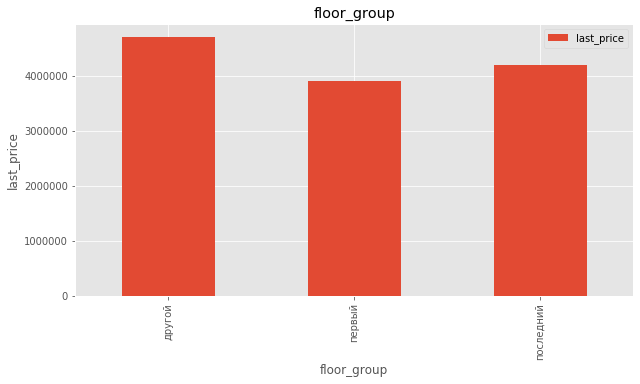

In [37]:
df.groupby('floor_group')[['last_price']].median().plot(kind='bar')
plt.title("floor_group")
plt.xlabel("floor_group")
plt.ylabel("last_price")


<div class="alert alert-info">
    <h2> Комментарий </h2>
    По датафрейму дешевле всего представлены квартиры на первом и последнем этаже

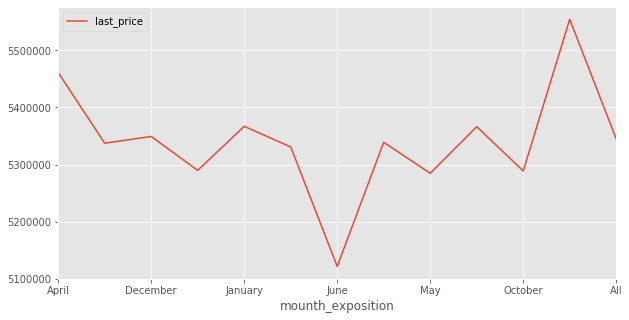

In [38]:
df.pivot_table('last_price', index='mounth_exposition', margins=True).plot()

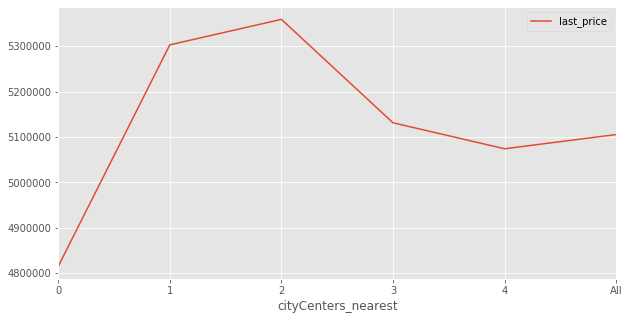

In [39]:
df=df.query('cityCenters_nearest < 5') 
df.pivot_table('last_price', index='cityCenters_nearest', margins=True).plot()

<div class="alert alert-info">
    <h2> Комментарий </h2>
    Самые дорогие квартиры находятся в радиусе 1-2 км от центра

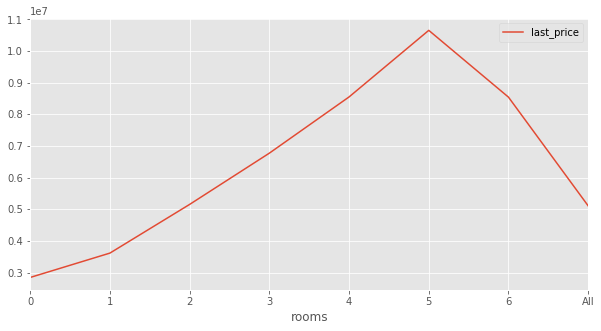

In [40]:
df=df.query('rooms < 7') 
df.pivot_table('last_price', index='rooms', margins=True).plot()


<div class="alert alert-info">
    <h2> Комментарий </h2>
    На этом графике хорошо видно, как цена увеличивается с увеличение числа комнат

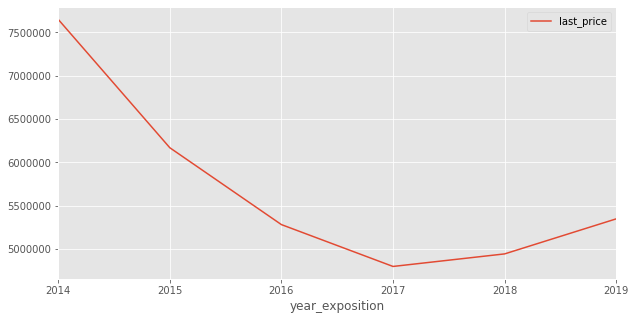

In [41]:
df.pivot_table('last_price', index='year_exposition').plot()

<div class="alert alert-info">
    <h2> Комментарий </h2>
  На первом и на последнем этаже находятся самые дешёвые квартиры, при этом на первом дешевле всех. Цена увеличивается с увеличением числа комнат и чем дальше от центра, тем дороже. В радиусе 1-2км от центра квартиры самые дорогие.Осенью, а именно в октябре самые дешёвые квартиры, кроме того прослеживается восходящий тренд с начала месяца к концу, то квартиры опубликованные в начале месяца квартиры дешевле. Видим что в 2018 году квартиры были самыми дешёвыми и с 2018го года наблюдается небольшой рост


***

<div class="alert alert-info">
    <h2> Комментарий </h2>
    
    Задача: Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [42]:
df_total = df['locality_name'].value_counts()
df_total.head(10)

Санкт-Петербург    2394
Мурино              133
Шушары              100
Кудрово              97
Пушкин               77
Колпино              73
Всеволожск           68
Парголово            60
Гатчина              52
Ломоносов            41
Name: locality_name, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 4 to 23698
Data columns (total 28 columns):
total_images            3886 non-null int64
last_price              3886 non-null int64
total_area              3886 non-null float64
first_day_exposition    3886 non-null datetime64[ns]
rooms                   3886 non-null int64
ceiling_height          3886 non-null float64
floors_total            3855 non-null float64
living_area             3886 non-null float64
floor                   3886 non-null int64
is_apartment            3886 non-null int64
studio                  3886 non-null bool
open_plan               3886 non-null bool
kitchen_area            3886 non-null float64
balcony                 3886 non-null float64
locality_name           3886 non-null object
airports_nearest        3886 non-null float64
cityCenters_nearest     3886 non-null int64
parks_around3000        3886 non-null float64
parks_nearest           3886 non-null object
ponds_around3000        3886 no

In [44]:
df['price_for_one_meter'] = df['price_for_one_meter'].astype('int')

In [45]:
df_locality_name = df[['locality_name', 'price_for_one_meter','last_price']]
df_locality_name = df.groupby('locality_name').price_for_one_meter.agg(['count', 'mean']).sort_values(by='count', ascending = False)
df_locality_name.head(10)

,count,mean
locality_name,,
Санкт-Петербург,2394,106143.313283
Мурино,133,84416.218045
Шушары,100,72772.120000
Кудрово,97,91010.443299
Пушкин,77,99851.402597
Колпино,73,73411.397260
Всеволожск,68,61745.985294
Парголово,60,84387.400000
Гатчина,52,66935.500000


In [46]:
df_locality_name = df.groupby('locality_name').last_price.agg(['count', 'max']).sort_values(by='count', ascending = False)
df_locality_name.head(10)

,count,max
locality_name,,
Санкт-Петербург,2394,19990000
Мурино,133,6400333
Шушары,100,8179000
Кудрово,97,8000000
Пушкин,77,16051000
Колпино,73,8600000
Всеволожск,68,6300000
Парголово,60,8000000
Гатчина,52,6100000


In [47]:
df_locality_name = df.groupby('locality_name').last_price.agg(['count', 'min']).sort_values(by='count', ascending = False)
df_locality_name.head(10)

,count,min
locality_name,,
Санкт-Петербург,2394,1350000
Мурино,133,1811250
Шушары,100,1780000
Кудрово,97,1800000
Пушкин,77,2400000
Колпино,73,2100000
Всеволожск,68,1150000
Парголово,60,1800000
Гатчина,52,1450000


<div class="alert alert-info">
    <h2> Комментарий </h2>
    В городе Санкт-Петербург наибольшее количество предложений с максимальной стоимостью жилья в 763млн. и с минимальной 12190. В Выборге при этом, последняя строчка топ10 по количеству публикаций, максимальная стоимость составила 19.99млн и минимальная 600тыс. Средняя стоимость жилья составила в Санкт-Петербурге - 114848, а в Выборге - 58141.  
    

***

<div class="alert alert-info">
    <h2> Комментарий </h2>
    
    Задание: Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [48]:
df_center = df[['locality_name', 'cityCenters_nearest']]
df_center.describe() 

,cityCenters_nearest
count,3886.000000
mean,1.915594
std,1.511204
min,0.000000
25%,0.000000
50%,2.000000
75%,3.000000
max,4.000000


In [49]:
df_St_Peterburg = df.groupby('locality_name').cityCenters_nearest.agg(['count', 'max', 'min']).sort_values(by='count', ascending = False)
df_St_Peterburg.head()

,count,max,min
locality_name,,,
Санкт-Петербург,2394,4,0
Мурино,133,4,0
Шушары,100,4,0
Кудрово,97,4,0
Пушкин,77,4,0


In [50]:
df_St_Peterburg = df.query('locality_name == "Санкт-Петербург"')
df_St_Peterburg.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition,koeff_liv_k_tot,price_for_one_meter
count,2394.000000,2.394000e+03,2394.000000,2394.000000,2394.000000,2368.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2141.000000,2394.000000
mean,1.925647,6.203041e+06,58.393521,2.045530,2.711667,11.407095,33.514536,5.600668,0.001253,11.979977,0.488304,27708.077277,1.925647,0.601086,0.818713,180.470551,0.566360,106143.313283
std,1.510897,3.268703e+06,24.656944,1.001469,0.208749,6.379412,16.422941,4.014716,0.035385,7.306953,0.869258,11605.409987,1.510897,0.773581,0.932158,235.715517,0.106271,28631.396285
min,0.000000,1.350000e+06,12.000000,0.000000,2.300000,2.000000,7.382179,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.196382,35384.000000
25%,0.000000,3.850000e+06,40.000000,1.000000,2.650000,5.000000,19.000000,2.000000,0.000000,7.300000,0.000000,18428.000000,0.000000,0.000000,0.000000,42.000000,0.498667,87626.500000
50%,2.000000,5.147000e+06,52.000000,2.000000,2.650000,9.000000,30.200000,5.000000,0.000000,10.000000,0.000000,25738.500000,2.000000,0.000000,1.000000,90.000000,0.564706,100783.500000
75%,3.000000,7.500600e+06,71.477500,3.000000,2.700000,16.000000,43.000000,8.000000,0.000000,13.840000,1.000000,36951.250000,3.000000,1.000000,1.000000,215.000000,0.642857,119237.500000
max,4.000000,1.999000e+07,149.200000,6.000000,3.950000,35.000000,110.400000,17.000000,1.000000,62.200000,5.000000,54723.000000,4.000000,3.000000,3.000000,1513.000000,1.000000,387096.000000


In [51]:
df_St_Peterburg['St_Peterburg_for_one_meter'] = df_St_Peterburg['last_price'] / df_St_Peterburg['cityCenters_nearest']
df_St_Peterburg.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition,koeff_liv_k_tot,price_for_one_meter,St_Peterburg_for_one_meter
count,2394.000000,2.394000e+03,2394.000000,2394.000000,2394.000000,2368.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2141.000000,2394.000000,2.394000e+03
mean,1.925647,6.203041e+06,58.393521,2.045530,2.711667,11.407095,33.514536,5.600668,0.001253,11.979977,0.488304,27708.077277,1.925647,0.601086,0.818713,180.470551,0.566360,106143.313283,inf
std,1.510897,3.268703e+06,24.656944,1.001469,0.208749,6.379412,16.422941,4.014716,0.035385,7.306953,0.869258,11605.409987,1.510897,0.773581,0.932158,235.715517,0.106271,28631.396285,NaN
min,0.000000,1.350000e+06,12.000000,0.000000,2.300000,2.000000,7.382179,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.196382,35384.000000,4.616620e+05
25%,0.000000,3.850000e+06,40.000000,1.000000,2.650000,5.000000,19.000000,2.000000,0.000000,7.300000,0.000000,18428.000000,0.000000,0.000000,0.000000,42.000000,0.498667,87626.500000,1.630833e+06
50%,2.000000,5.147000e+06,52.000000,2.000000,2.650000,9.000000,30.200000,5.000000,0.000000,10.000000,0.000000,25738.500000,2.000000,0.000000,1.000000,90.000000,0.564706,100783.500000,3.511202e+06
75%,3.000000,7.500600e+06,71.477500,3.000000,2.700000,16.000000,43.000000,8.000000,0.000000,13.840000,1.000000,36951.250000,3.000000,1.000000,1.000000,215.000000,0.642857,119237.500000,inf
max,4.000000,1.999000e+07,149.200000,6.000000,3.950000,35.000000,110.400000,17.000000,1.000000,62.200000,5.000000,54723.000000,4.000000,3.000000,3.000000,1513.000000,1.000000,387096.000000,inf


In [52]:
df_St_Peterburg.groupby('last_price').last_price.agg(['count']).sort_values(by='count', ascending = False)

,count
last_price,
3500000,39
3700000,35
4200000,29
4000000,28
3800000,27
...,...
5794000,1
5810000,1
5830000,1


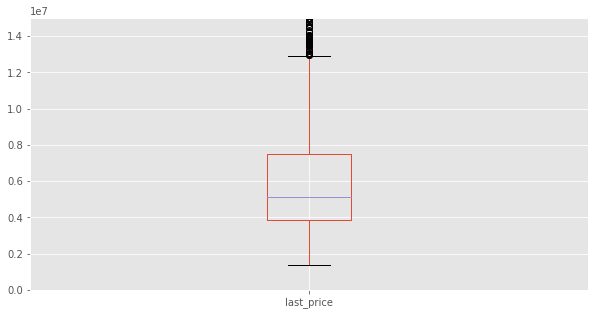

In [53]:
plt.ylim(0, 15000000)
df_St_Peterburg.boxplot('last_price')

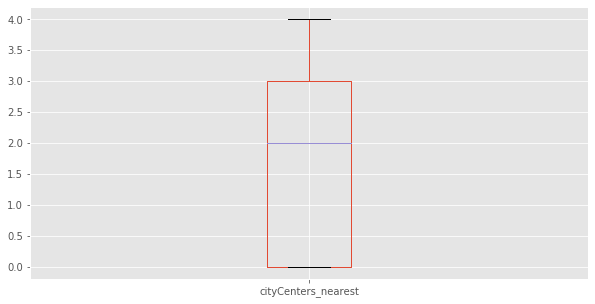

In [54]:
df_St_Peterburg.boxplot('cityCenters_nearest')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


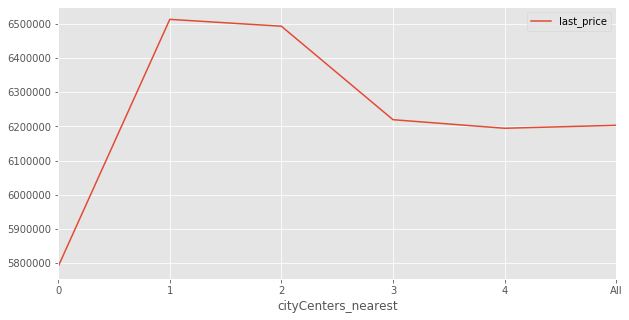

In [55]:
df_St_Peterburg['cityCenters_nearest'] = df_St_Peterburg['cityCenters_nearest'].astype('int')
df_St_Peterburg.pivot_table('last_price', index='cityCenters_nearest', margins=True).plot() 

<div class="alert alert-info">
    <h2> Комментарий </h2>
    Цена квартиры в Санкт-Петербурге так же зависит от центра, самые дорогие квартиры в районе 1-2 км от центра

<div class="alert alert-info">
   Задание: Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [56]:
df_center_of_St_Peterburg = df_St_Peterburg.query('cityCenters_nearest < 10')
df_center_of_St_Peterburg

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,koeff_liv_k_tot,price_for_one_meter,year_exposition,mounth_exposition,day_exposition,floor_group,St_Peterburg_for_one_meter
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,0,...,1.0,48,121.0,0.320000,100000,2018,June,19,другой,5.000000e+06
34,3,3290000,33.00,2018-02-04,1,2.55,16.0,14.0,3,0,...,0.0,,15.0,0.424242,99696,2018,February,04,другой,1.096667e+06
49,1,3050000,30.80,2018-11-22,1,2.50,9.0,18.0,7,0,...,0.0,,81.0,0.584416,99025,2018,November,22,другой,3.050000e+06
94,3,3500000,29.50,2019-04-26,1,2.50,5.0,15.6,2,0,...,0.0,,4.0,0.528814,118644,2019,April,26,другой,1.166667e+06
111,4,4590000,40.00,2017-05-29,1,2.65,6.0,18.0,1,0,...,0.0,,31.0,0.450000,114750,2017,May,29,первый,1.147500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,4,5650000,54.00,2017-04-30,2,2.75,12.0,28.0,4,0,...,0.0,,193.0,0.518519,104629,2017,April,30,другой,1.412500e+06
23657,2,5990000,64.00,2017-04-21,2,2.65,19.0,31.0,16,0,...,1.0,1127,40.0,0.484375,93593,2017,April,21,другой,2.995000e+06
23662,0,6151120,66.86,2017-12-15,2,2.70,18.0,32.9,7,0,...,1.0,861,203.0,0.492073,92000,2017,December,15,другой,inf
23671,3,3450000,35.30,2017-04-14,1,2.50,9.0,17.5,4,0,...,1.0,232,21.0,0.495751,97733,2017,April,14,другой,1.150000e+06


<div class="alert alert-info">
    <h2> Комментарий </h2>
    Выше составил график plot и ящик с усами для определения центра. И да! ты была права про 3 км, это наш радиус

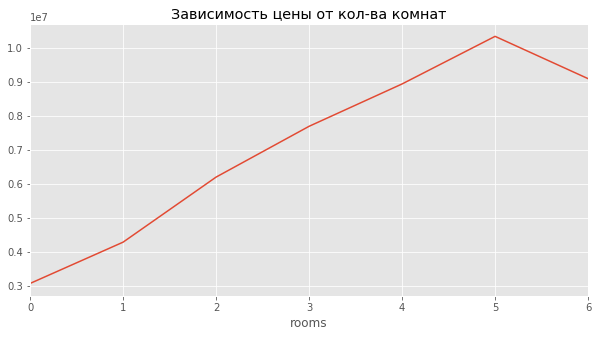

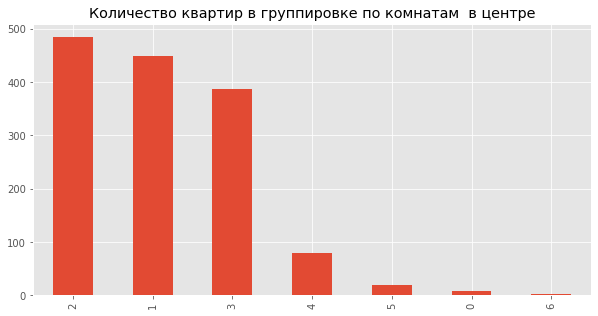

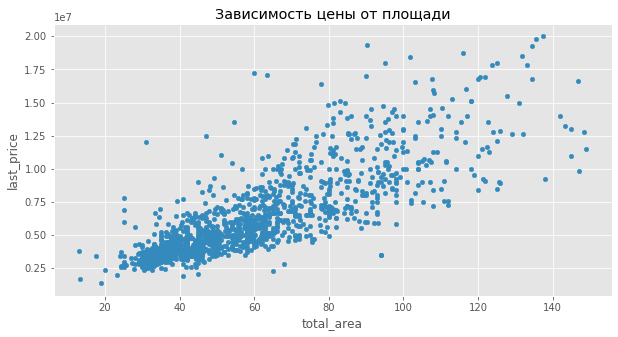

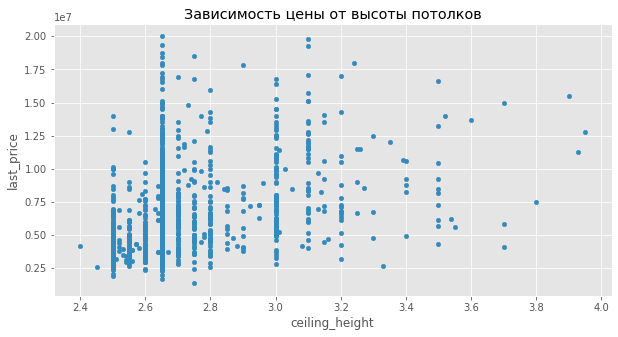

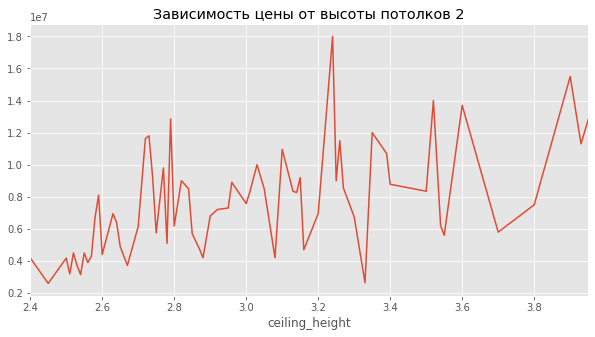

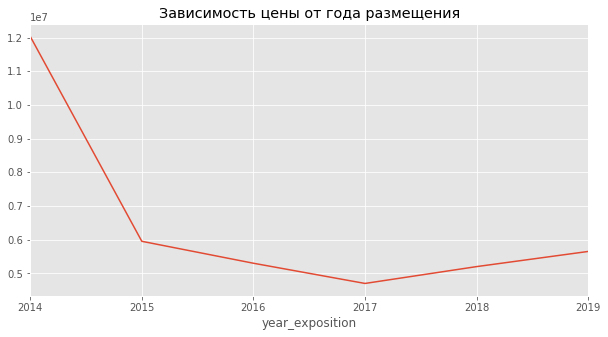

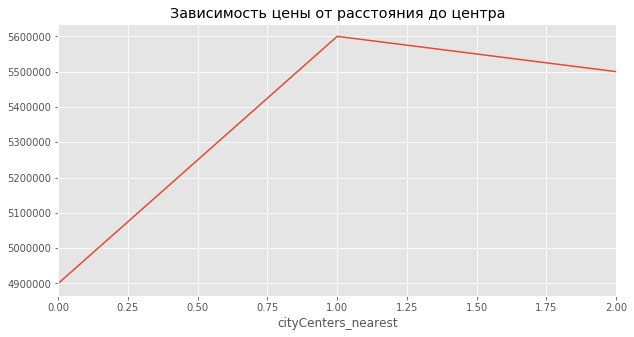

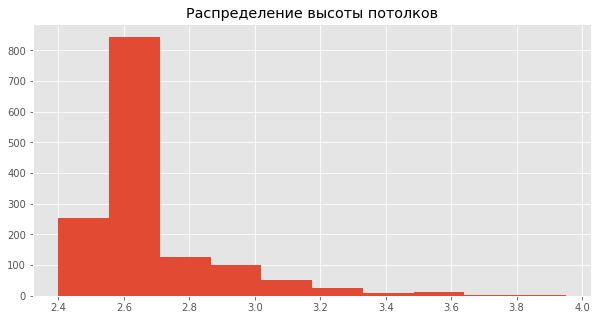

In [85]:

df_center_of_St_Peterburg2 = df_St_Peterburg.query('cityCenters_nearest < 3')

df_center_of_St_Peterburg2.groupby('rooms')['last_price'].mean().plot()
plt.title("Зависимость цены от кол-ва комнат")
plt.show()

df_center_of_St_Peterburg2.rooms.value_counts().plot.bar()
plt.title("Количество квартир в группировке по комнатам  в центре")
plt.show()


df_center_of_St_Peterburg2.plot.scatter(x='total_area', y='last_price')
plt.title("Зависимость цены от площади")
plt.show()

df_center_of_St_Peterburg2.plot.scatter(x='ceiling_height', y='last_price')
plt.title("Зависимость цены от высоты потолков")
plt.show()

df_center_of_St_Peterburg2.groupby('ceiling_height')['last_price'].median().plot()
plt.title("Зависимость цены от высоты потолков 2")
plt.show()

df_center_of_St_Peterburg2.groupby('year_exposition')['last_price'].median().plot()
plt.title("Зависимость цены от года размещения")
plt.show()

df_center_of_St_Peterburg2.groupby('cityCenters_nearest')['last_price'].median().plot()
plt.title("Зависимость цены от расстояния до центра")
plt.show()


df_center_of_St_Peterburg2['ceiling_height'].hist()
plt.title("Распределение высоты потолков")
plt.show()

In [57]:
df_center_of_St_Peterburg.query('rooms != 0').groupby('rooms')[['total_area']].count()

,total_area
rooms,
1,829
2,779
3,597
4,130
5,35
6,4


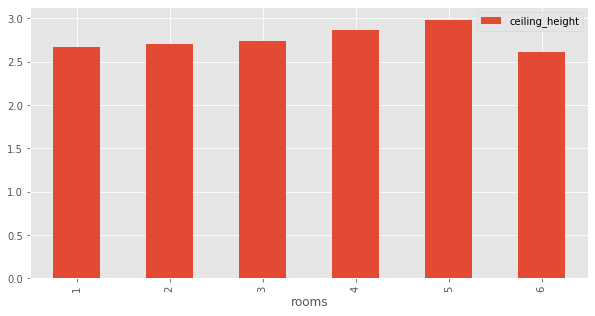

In [58]:
df_center_of_St_Peterburg.query('rooms != 0 & rooms < 7').groupby('rooms')[['ceiling_height']].mean().plot(kind='bar')

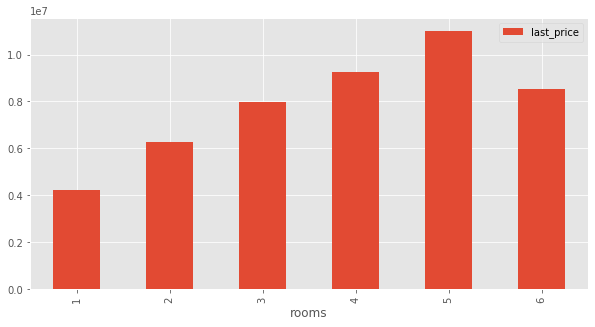

In [59]:
df_center_of_St_Peterburg.query('rooms != 0 & rooms < 7').groupby('rooms')[['last_price']].mean().plot(kind='bar')

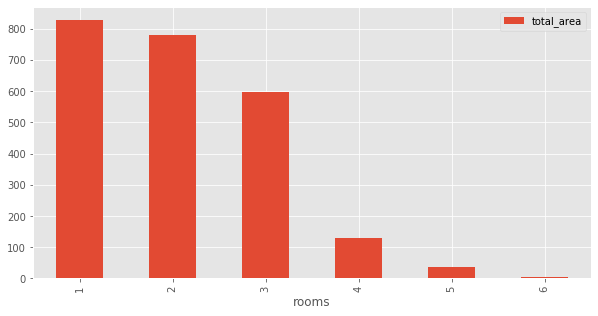

In [60]:
df_center_of_St_Peterburg.query('rooms != 0 & rooms < 7').groupby('rooms')[['total_area']].count().plot(kind='bar')

Text(0, 0.5, 'counts')

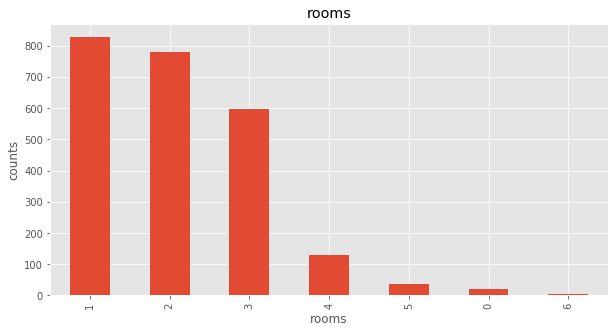

In [61]:

df_center_of_St_Peterburg.rooms.value_counts().plot.bar()
plt.title("rooms")
plt.xlabel("rooms")
plt.ylabel("counts")

<div class="alert alert-info">
    <h2> Комментарий</h2>
    Наибольшее количество в центре Санк-Петербурге выставленных на продажу в этом датафрейме однокомнатных квартир

Text(0, 0.5, 'last_price')

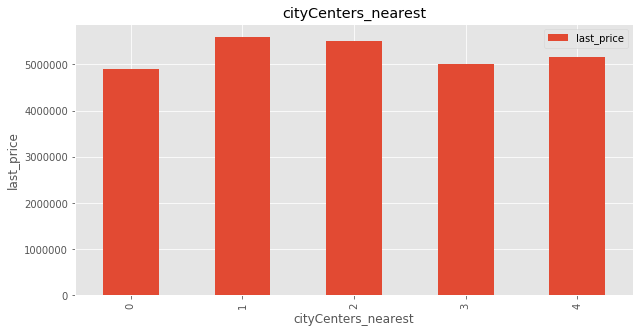

In [62]:
df_center_of_St_Peterburg.groupby('cityCenters_nearest')[['last_price']].median().plot(kind='bar')
plt.title("cityCenters_nearest")
plt.xlabel("cityCenters_nearest")
plt.ylabel("last_price")

Text(0, 0.5, 'last_price')

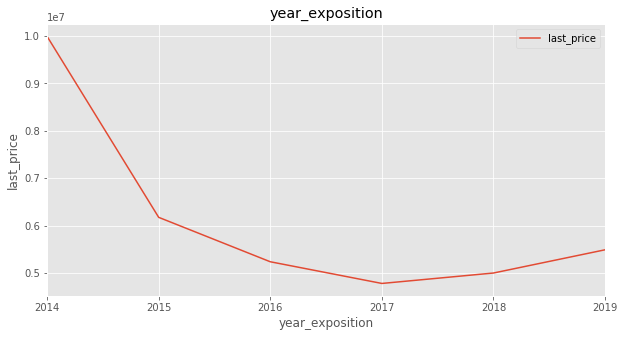

In [63]:
df_center_of_St_Peterburg.groupby('year_exposition')[['last_price']].median().plot()
plt.title("year_exposition")
plt.xlabel("year_exposition")
plt.ylabel("last_price")

<div class="alert alert-info">
    <h2> Комментарий </h2>
    Наблюдаем падение цены с 2014го по 2017, после начинается небольшой рост

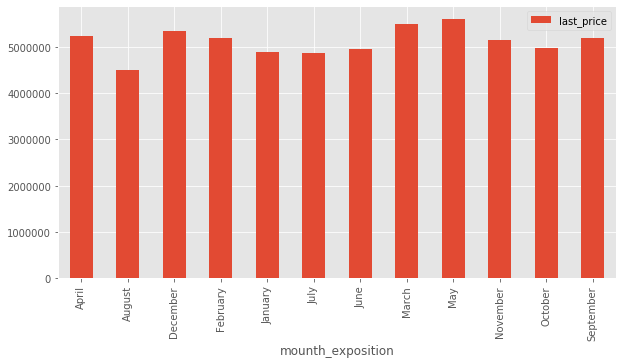

In [64]:
df_center_of_St_Peterburg.groupby('mounth_exposition')[['last_price']].median().plot(kind='bar')

Text(0, 0.5, 'last_price')

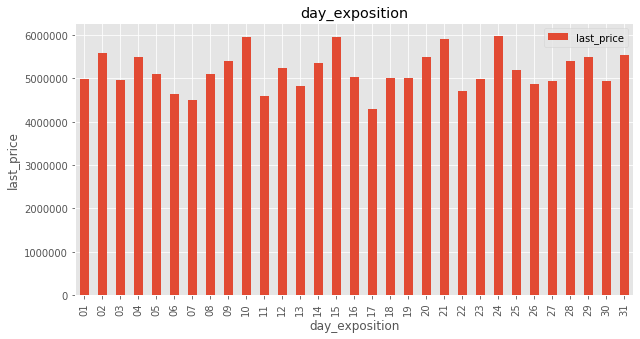

In [65]:
df_center_of_St_Peterburg.groupby('day_exposition')[['last_price']].median().plot(kind='bar')
plt.title("day_exposition")
plt.xlabel("day_exposition")
plt.ylabel("last_price")

Text(0, 0.5, 'last_price')

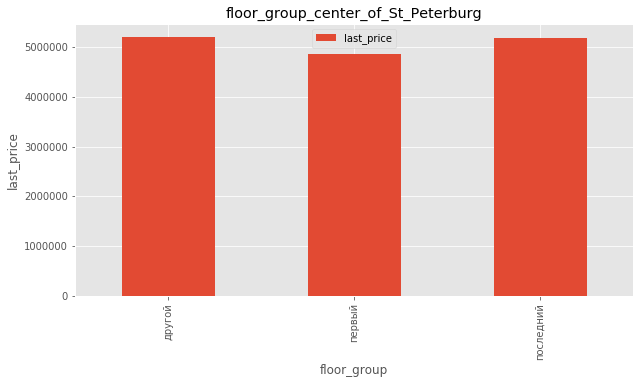

In [66]:
df_center_of_St_Peterburg.groupby('floor_group')[['last_price']].median().plot(kind='bar')
plt.title("floor_group_center_of_St_Peterburg")
plt.xlabel("floor_group")
plt.ylabel("last_price")

<div class="alert alert-info">
    <h2> Комментарий </h2>
    Последние этажи в центра самые дорогие, а вот первые самые дешёвые

Text(0, 0.5, 'ceiling_height')

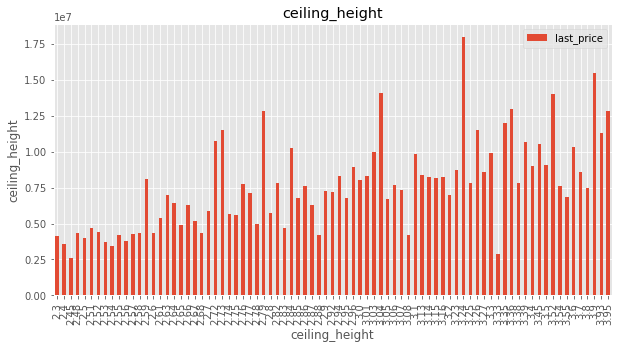

In [67]:
df_center_of_St_Peterburg.groupby('ceiling_height')[['last_price']].median().plot(kind='bar')
plt.title("ceiling_height")
plt.xlabel("ceiling_height")
plt.ylabel("ceiling_height")

<div class="alert alert-info">
    <h2> Комментарий </h2>
    7500 объявлений находятся в пределах 10 км от центра города Санкт-Петербург, со средней ценой квартиры в 5млн. Так же наблюдаем небольшой рост цены квартир в 2019 по сравнению с 2018, кроме того самые дешёвые предложения в октябре и в середине месяца 17го числа и в районе 7го числа. Однокомнатных квартир больше всего, чуть поменьше 2х и 3х комнатных. Чем больше комнат, тем квартира дороже. Средняя высота потолка составила 2,7м. В целом, все показатели этой выборки схожи с показателями всего датафрейма 

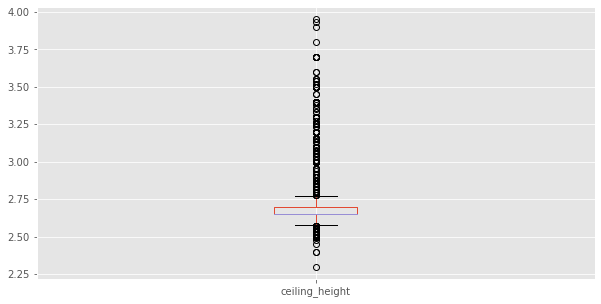

In [68]:
df_center_of_St_Peterburg.boxplot('ceiling_height')

2.7116666666666664

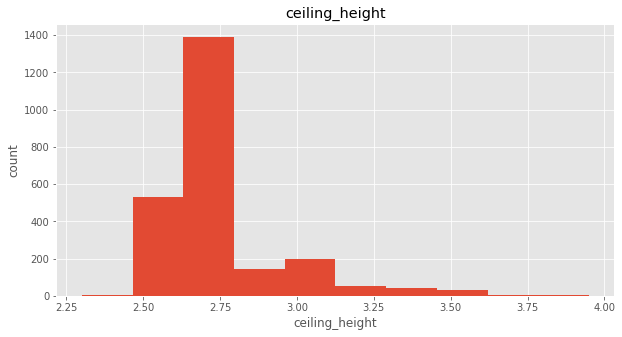

In [69]:
pd.Series(df_center_of_St_Peterburg['ceiling_height']).hist()
plt.title("ceiling_height")
plt.xlabel("ceiling_height")
plt.ylabel("count")
df_center_of_St_Peterburg['ceiling_height'].mean()

<div class="alert alert-info">
    <h2> Комментарий </h2>
    Средняя высота потолков по выбранному нами центру Санкт-Петербурга составляет 2,7м

***

## Общий вывод

<div class="alert alert-info">
    <h2> Комментарий </h2>
    Проанализировав таблицу, могу сказать следующее:
    
1. Больше всего объявлений о продаже квартир в г.Санкт-Петербург
2. Средняя цена квартиры составляет 5млн.
3. Средняя цена квадратного метра при этом 114848
4. Самые лучшие предложения поступали осенью, в середине или в начале месяца.
5. Самое большее количество предложений о продаже однокомнатных квартир.
6. Самые дорогие предложения поступали в 2014  в 2015 годах, а в 2019 году наблюдается небольшой рост цены.
7. Самые дорогие квартиры в центре Санкт-Петербурга в районе 1-2км, такая же тенденция замечена по всему датафрейму. Чем ближе к центру тем дороже. Медианная цена квартиры в Санкт-Петербурге в центре дороже квартир во всех городах датафрейма примерно на 1млн.(5,5 в Санкт Петербурге против 4,5 по всему дата-фрейму) 
8.***Хочу обратить внимание***,что в предоставленных данных очень много пропусков и данный датафрейм не лучший для хорошего анализа. Возможно, это связано с выгрузкой данных.<div>
   
    
    